In [1]:
#Here is a Data Science Project about the rankikng of world universities and their factors
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\novin\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#import the dataset
data = pd.read_csv('E:\Machine Learning\IMT/eighteen_nineteen_university_datasets.csv', encoding = 'unicode_escape')
#'utf-8' codec can't decode byte 0xa0 in position 7: invalid start byte

In [3]:
#making a dataframe and calling it
df = pd.DataFrame(data)
pd.concat([df.head(5), df.tail(5)])

World Rank                            Institution        Location  \
0             1                     Harvard University             USA   
1             2                    Stanford University             USA   
2             3  Massachusetts Institute of Technology             USA   
3             4                University of Cambridge  United Kingdom   
4             5                   University of Oxford  United Kingdom   
995         996                    Aga Khan University        Pakistan   
996         997                 University of Calcutta           India   
997         998                       K?chi University           Japan   
998         999               Soonchunhyang University     South Korea   
999        1000              Capital Normal University           China   

     National Rank Quality of Education Alumni Employment Quality of Faculty  \
0                1                    2                 1                  1   
1                2                   10                 3                  2   
2                3                    3                11                  3   
3                1                    5                19                  6   
4                2                    9                25                 10   
995              3                    -            > 1000                  -   
996             17                  353               716                296   
997             56                    -            > 1000                  -   
998             35                    -            > 1000                  -   
999            108                    -               869                  -   

    Research Output Quality Publications Influence Citations  Score  
0                 1                    1         1         1  100.0  
1                10                    4         3         2   96.7  
2                30                   15         2         6   95.1  
3                12                    8         6        19   94.0  
4                 9                    5         7         4   93.2  
995          > 1000               > 1000       464       673   69.8  
996             798                  966    > 1000    > 1000   69.8  
997          > 1000               > 1000       811       673   69.8  
998             881               > 1000    > 1000       898   69.8  
999             923                  904       889    > 1000   69.8

In [4]:
#the names of columns
df.columns.tolist()

['World Rank',
 'Institution',
 'Location',
 'National Rank',
 'Quality\xa0of Education',
 'Alumni Employment',
 'Quality\xa0of Faculty',
 'Research Output',
 'Quality Publications',
 'Influence',
 'Citations',
 'Score']

In [5]:
#checking the nulls values
df.isnull().sum()

World Rank              0
Institution             0
Location                0
National Rank           0
Quality of Education    0
Alumni Employment       0
Quality of Faculty      0
Research Output         0
Quality Publications    0
Influence               0
Citations               0
Score                   0
dtype: int64

In [6]:
#droping the columns that includes "-" values
df2 = df.drop(['Quality\xa0of Education'], axis = 1)
df3 = df2.drop(['Quality\xa0of Faculty'], axis = 1)
df3

World Rank                                    Institution  \
0             1                             Harvard University   
1             2                            Stanford University   
2             3          Massachusetts Institute of Technology   
3             4                        University of Cambridge   
4             5                           University of Oxford   
5             6             University of California, Berkeley   
6             7                           Princeton University   
7             8                            Columbia University   
8             9             California Institute of Technology   
9            10                          University of Chicago   
10           11                                Yale University   
11           12                            University of Tokyo   
12           13                     University of Pennsylvania   
13           14                             Cornell University   
14           15          University of California, Los Angeles   
15           16                       Johns Hopkins University   
16           17                          University of Toronto   
17           18              University of Michigan, Ann Arbor   
18           19             University of Washington - Seattle   
19           20            University of California, San Diego   
20           21                      University College London   
21           22        University of California, San Francisco   
22           23                        Northwestern University   
23           24                                Duke University   
24           25                            New York University   
25           26                               Kyoto University   
26           27                University of WisconsinMadison   
27           28                                     ETH Zurich   
28           29                            Sorbonne University   
29           30                        Imperial College London   
..          ...                                            ...   
970         971                Chung Yuan Christian University   
971         972                   Guangzhou Medical University   
972         973                                Amherst College   
973         974                              Yunnan University   
974         975                Johannes Kepler University Linz   
975         976                       New York Medical College   
976         977  Missouri University of Science and Technology   
977         978                          University of Maribor   
978         979                             Atatürk University   
979         980                Eastern Virginia Medical School   
980         981     University of North Carolina at Greensboro   
981         982                    Beijing Forestry University   
982         983          Liverpool School of Tropical Medicine   
983         984                         University of Brighton   
984         985                    Federal University of Bahia   
985         986                       University of St. Gallen   
986         987                            Xiangtan University   
987         988             Manchester Metropolitan University   
988         989                         University of A Coruña   
989         990                           Khon Kaen University   
990         991                           University of Ibadan   
991         992                     Shahid Beheshti University   
992         993             University of Massachusetts Lowell   
993         994                          Loma Linda University   
994         995                            University of Macau   
995         996                            Aga Khan University   
996         997                         University of Calcutta   
997         998                               K?chi University   
998         999                       Soonchu

In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
World Rank              1000 non-null int64
Institution             1000 non-null object
Location                1000 non-null object
National Rank           1000 non-null int64
Alumni Employment       1000 non-null object
Research Output         1000 non-null object
Quality Publications    1000 non-null object
Influence               1000 non-null object
Citations               1000 non-null object
Score                   1000 non-null float64
dtypes: float64(1), int64(2), object(7)
memory usage: 78.2+ KB


In [8]:
df4 = df3.copy()

In [9]:
#replace the "> 1000" values to 1001
df4.replace("> 1000",'1001',inplace=True)

In [10]:
#change the type of columns from object to int
for col in df4.drop(columns=['Institution','Location','Score']):
    df4[col]=df4[col].astype(np.int64)

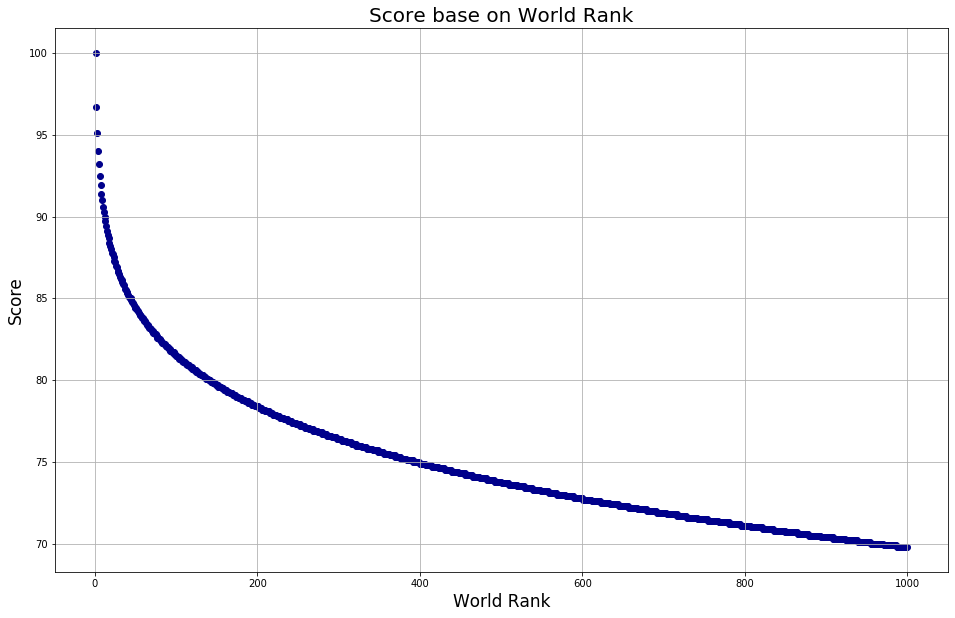

In [10]:
#Score base on World Rank plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["World Rank"], df4["Score"] , color = 'darkblue')
plt.title("Score base on World Rank", fontsize = 20)
plt.xlabel('World Rank', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

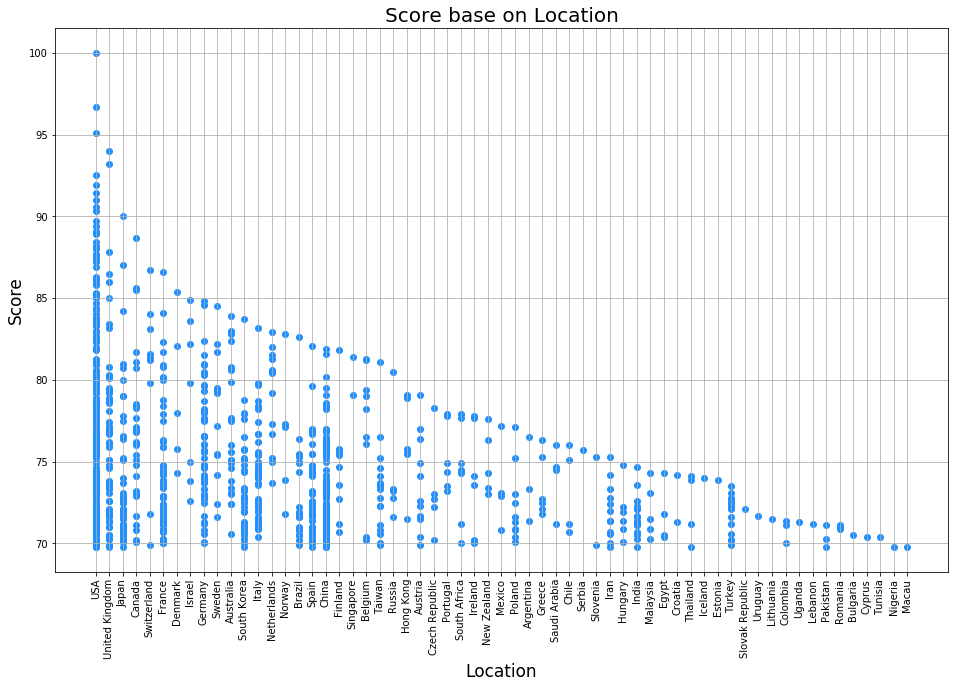

In [11]:
#Score base on Location plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["Location"], df4["Score"] , color = 'dodgerblue')
plt.title("Score base on Location", fontsize = 20)
plt.xticks(rotation=90)
plt.xlabel('Location', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

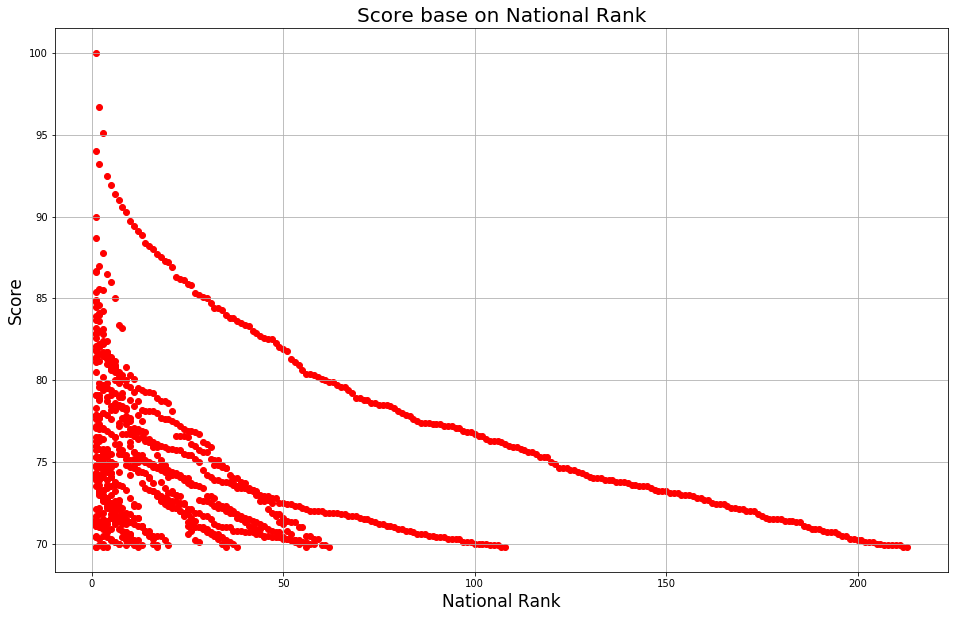

In [12]:
#Score base on National Rank plot
plt.figure(figsize = (16, 10))
plt.scatter(df3["National Rank"], df3["Score"] , color = 'red')
plt.title("Score base on National Rank", fontsize = 20)
plt.xlabel('National Rank', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

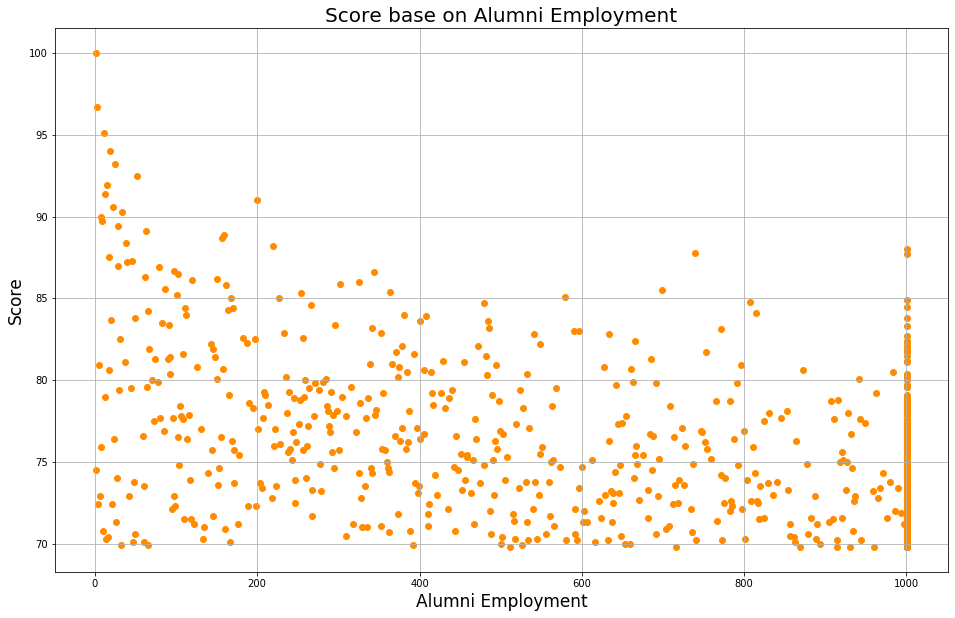

In [13]:
#Score base on Alumni Employment plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["Alumni Employment"], df4["Score"] , color = 'darkorange')
plt.title("Score base on Alumni Employment", fontsize = 20)
plt.xlabel('Alumni Employment', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

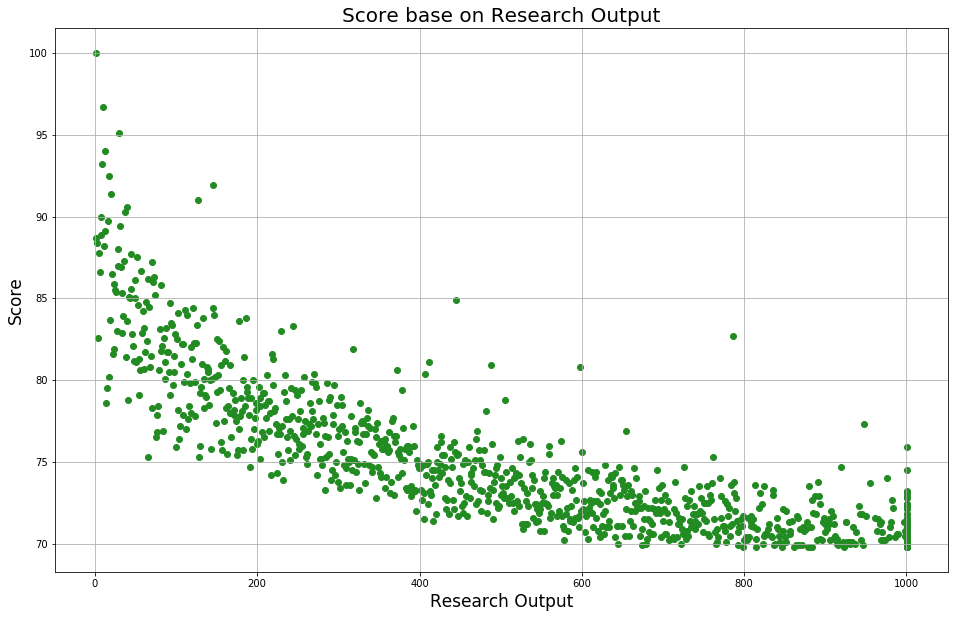

In [14]:
#Score base on Research Output plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["Research Output"], df4["Score"] , color = 'forestgreen')
plt.title("Score base on Research Output", fontsize = 20)
plt.xlabel('Research Output', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

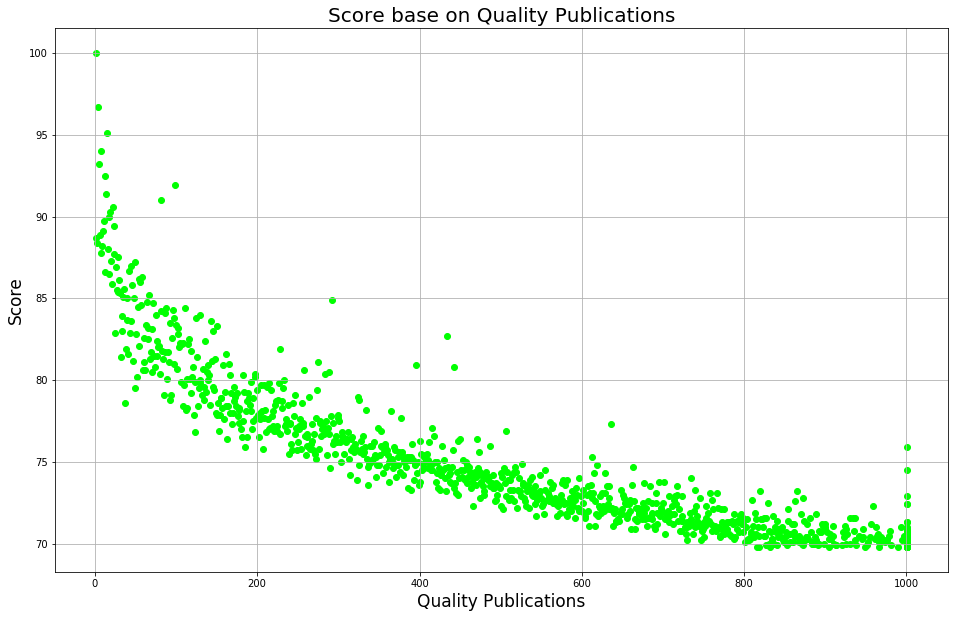

In [20]:
#Score base on Quality Publications plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["Quality Publications"], df4["Score"] , color = 'lime')
plt.title("Score base on Quality Publications", fontsize = 20)
plt.xlabel('Quality Publications', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

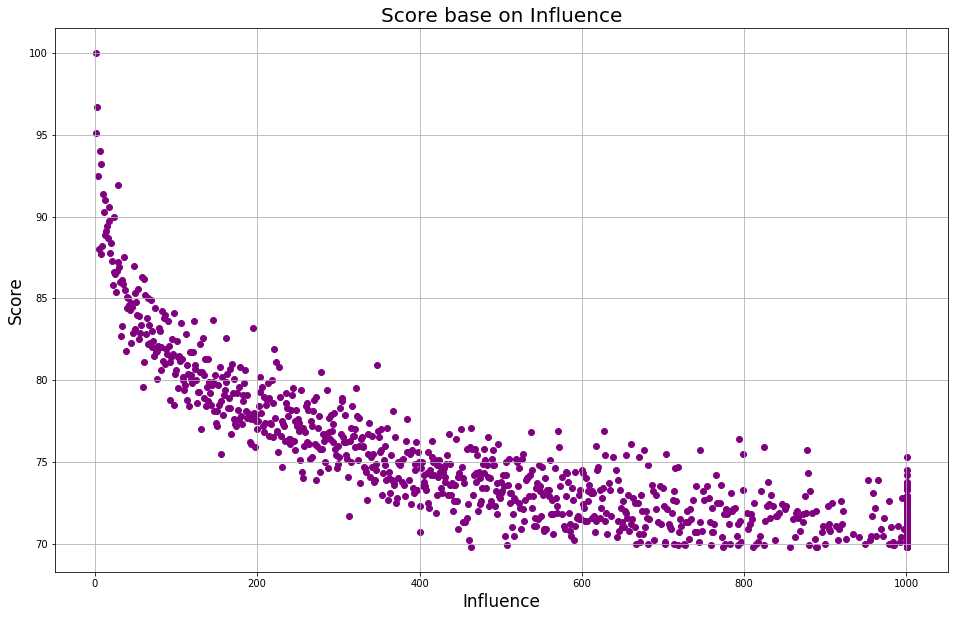

In [16]:
#Score base on Influence plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["Influence"], df4["Score"] , color = 'purple')
plt.title("Score base on Influence", fontsize = 20)
plt.xlabel('Influence', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

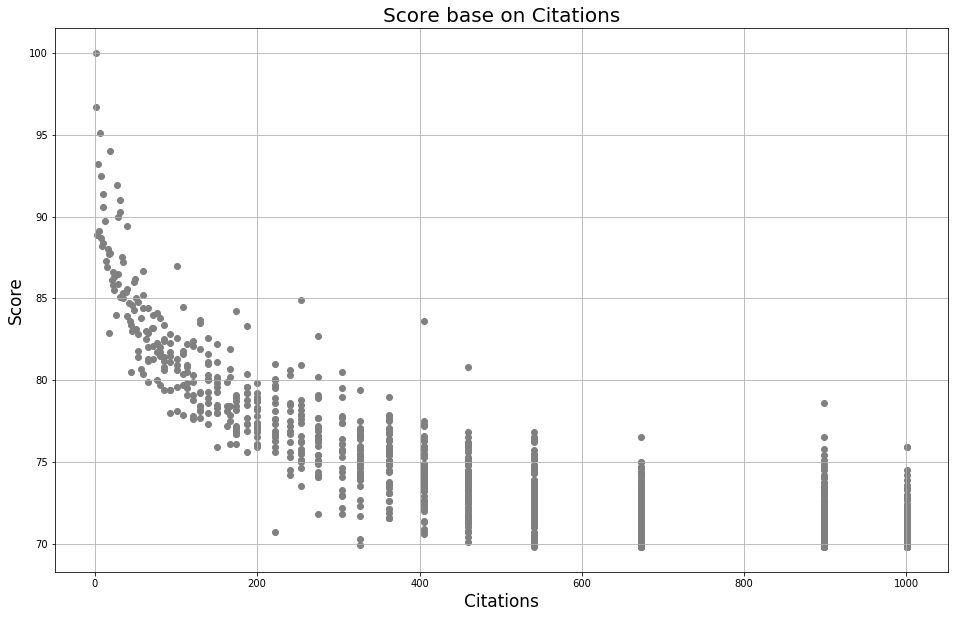

In [17]:
#Score base on Citations plot
plt.figure(figsize = (16, 10))
plt.scatter(df4["Citations"], df4["Score"] , color = 'gray')
plt.title("Score base on Citations", fontsize = 20)
plt.xlabel('Citations', fontsize = 17)
plt.ylabel('Score', fontsize = 17)
plt.grid()
plt.show()

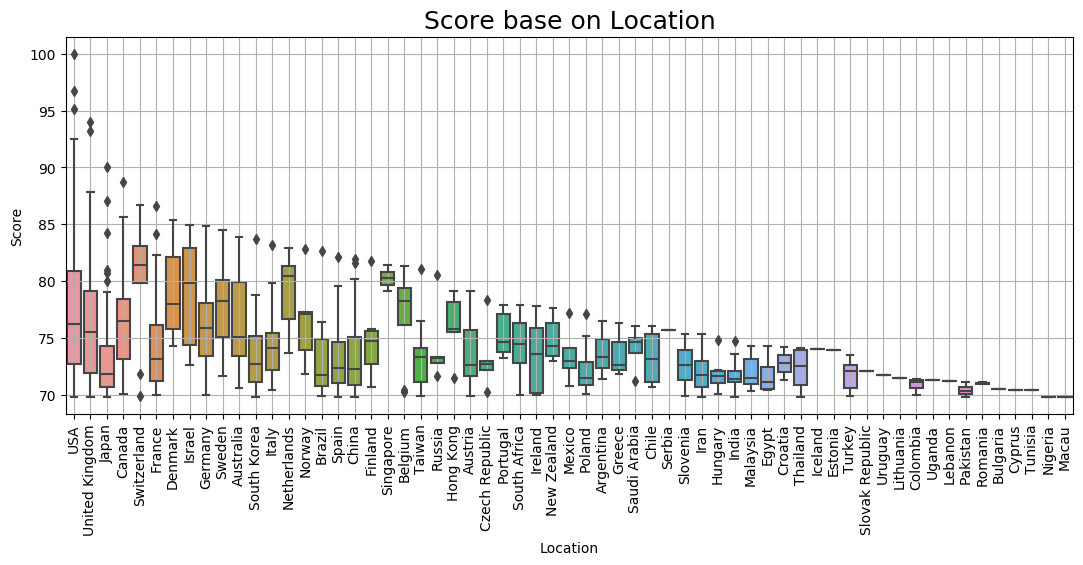

In [12]:
#Score base on Location boxplot
plt.figure(figsize=(13,5), dpi=100)
sns.boxplot(x = 'Location', y= 'Score',data= df4)
plt.title('Score base on Location',fontsize = 18)
plt.xticks(rotation = 90)
plt.grid()
plt.show()

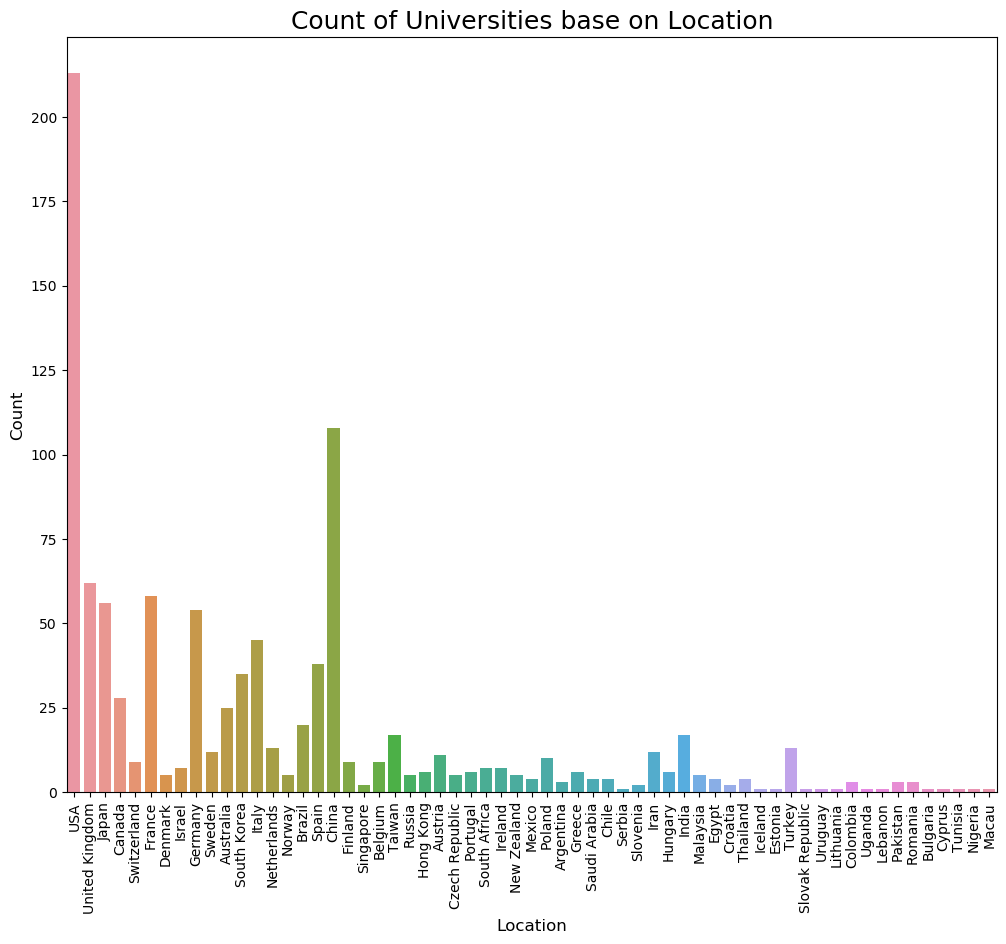

In [12]:
#Count of Universities base on Location barplot
plt.figure(figsize=(12,10), dpi = 100) 
sns.countplot(x='Location', data= df4) 
plt.title('Count of Universities base on Location',fontsize = 18)
plt.xlabel('Location', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=90)
plt.show()

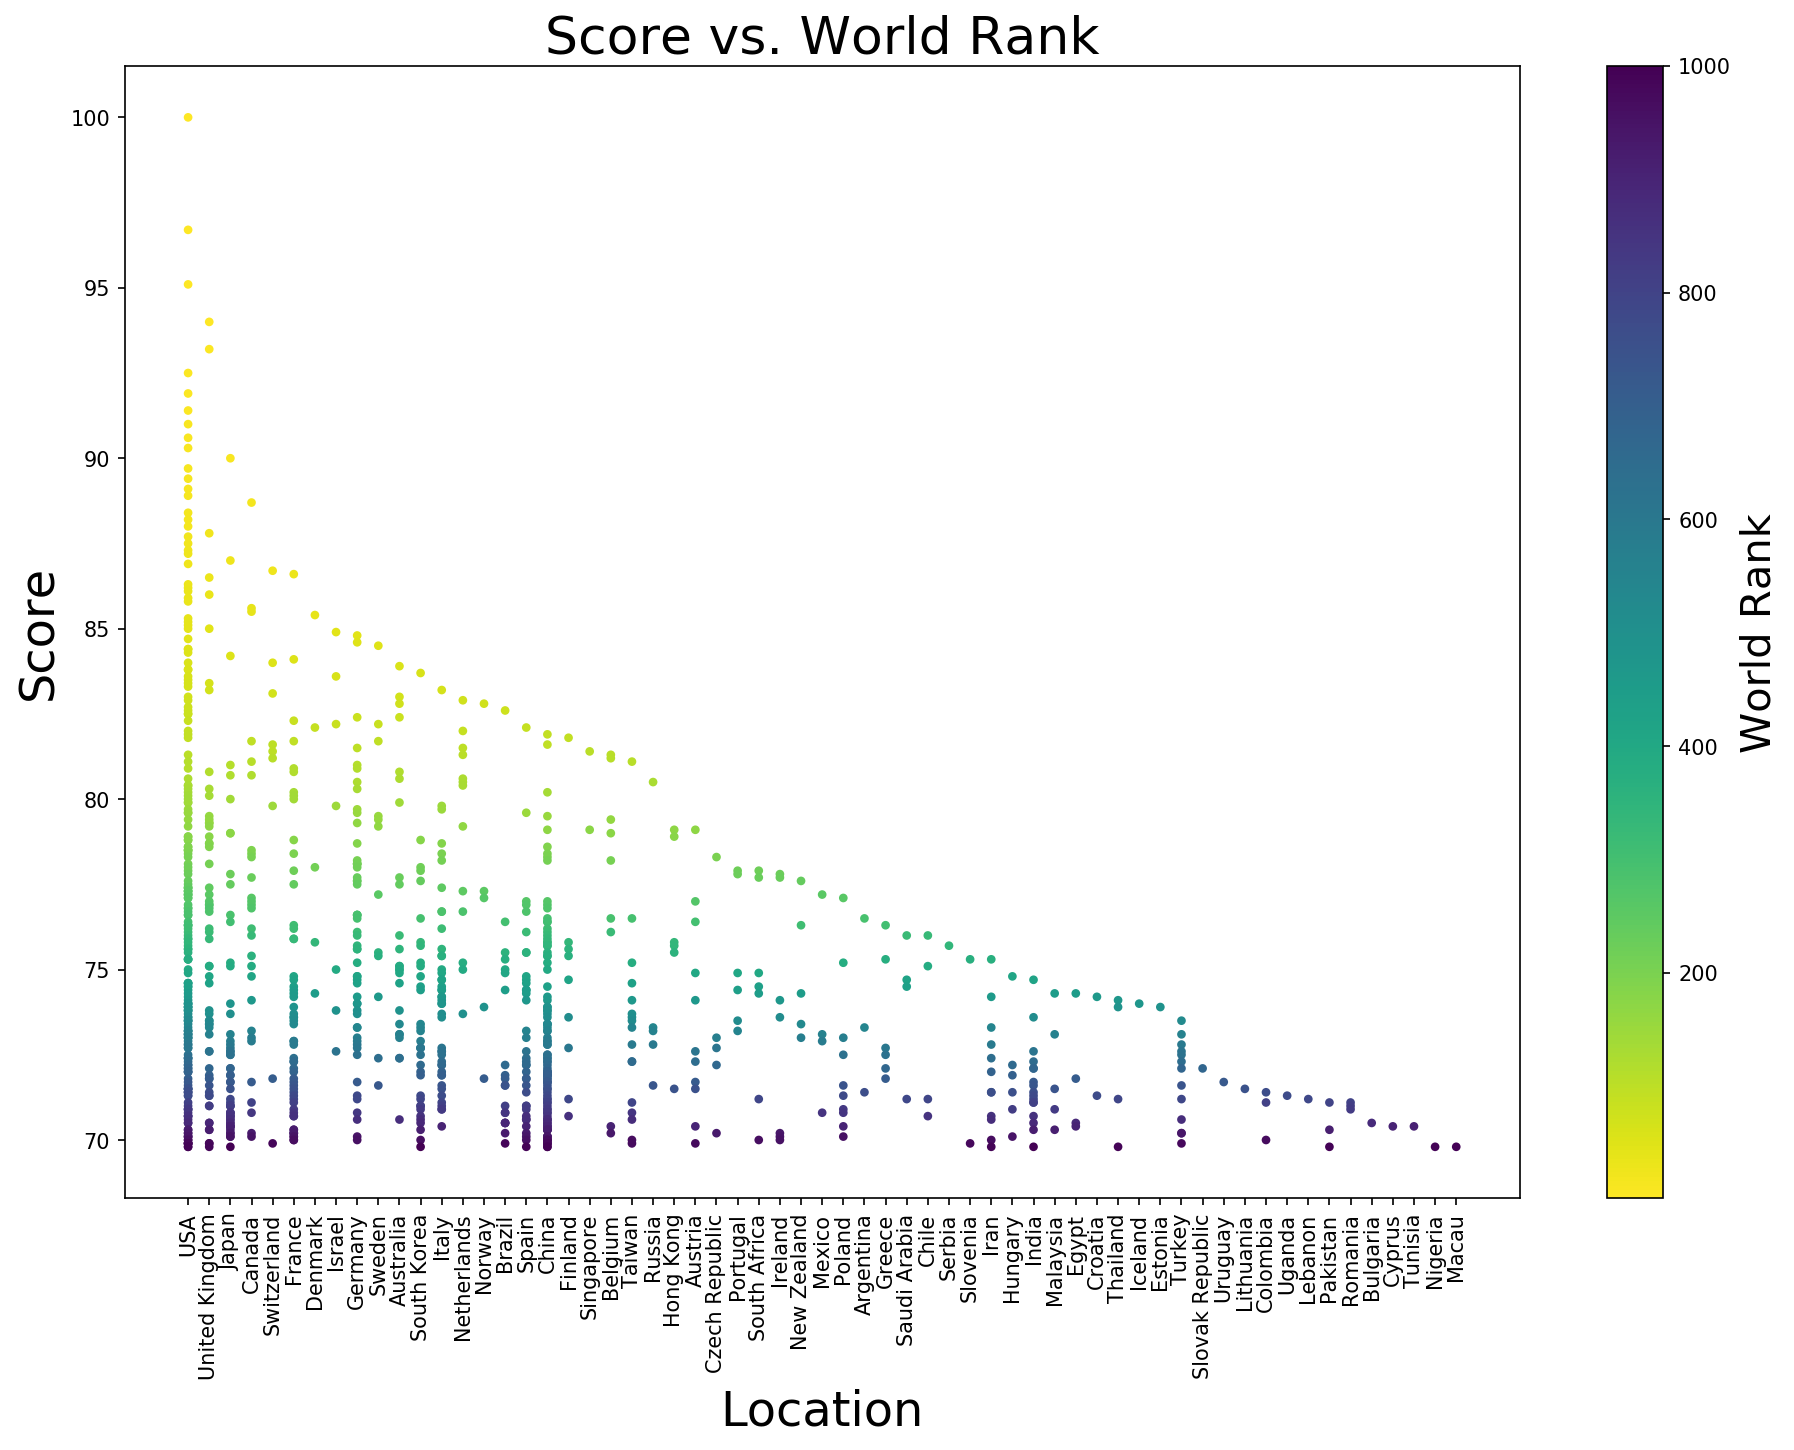

<Figure size 432x288 with 0 Axes>

In [27]:
#Score vs. Location base on Word Rank plot
plt.figure(figsize=(15,10), dpi = 150)
plt.scatter(df4["Location"], df4["Score"], c = df3['World Rank'],cmap='viridis_r', marker='o', s=10) # Plot the data
plt.title("Score vs. World Rank", fontsize = 25)
plt.xticks(rotation = 90)
plt.xlabel("Location", fontsize = 23)
plt.ylabel("Score", fontsize = 23)
plt.xticks(rotation = 90)
plt.colorbar().set_label('World Rank', fontsize = 20)
plt.show()

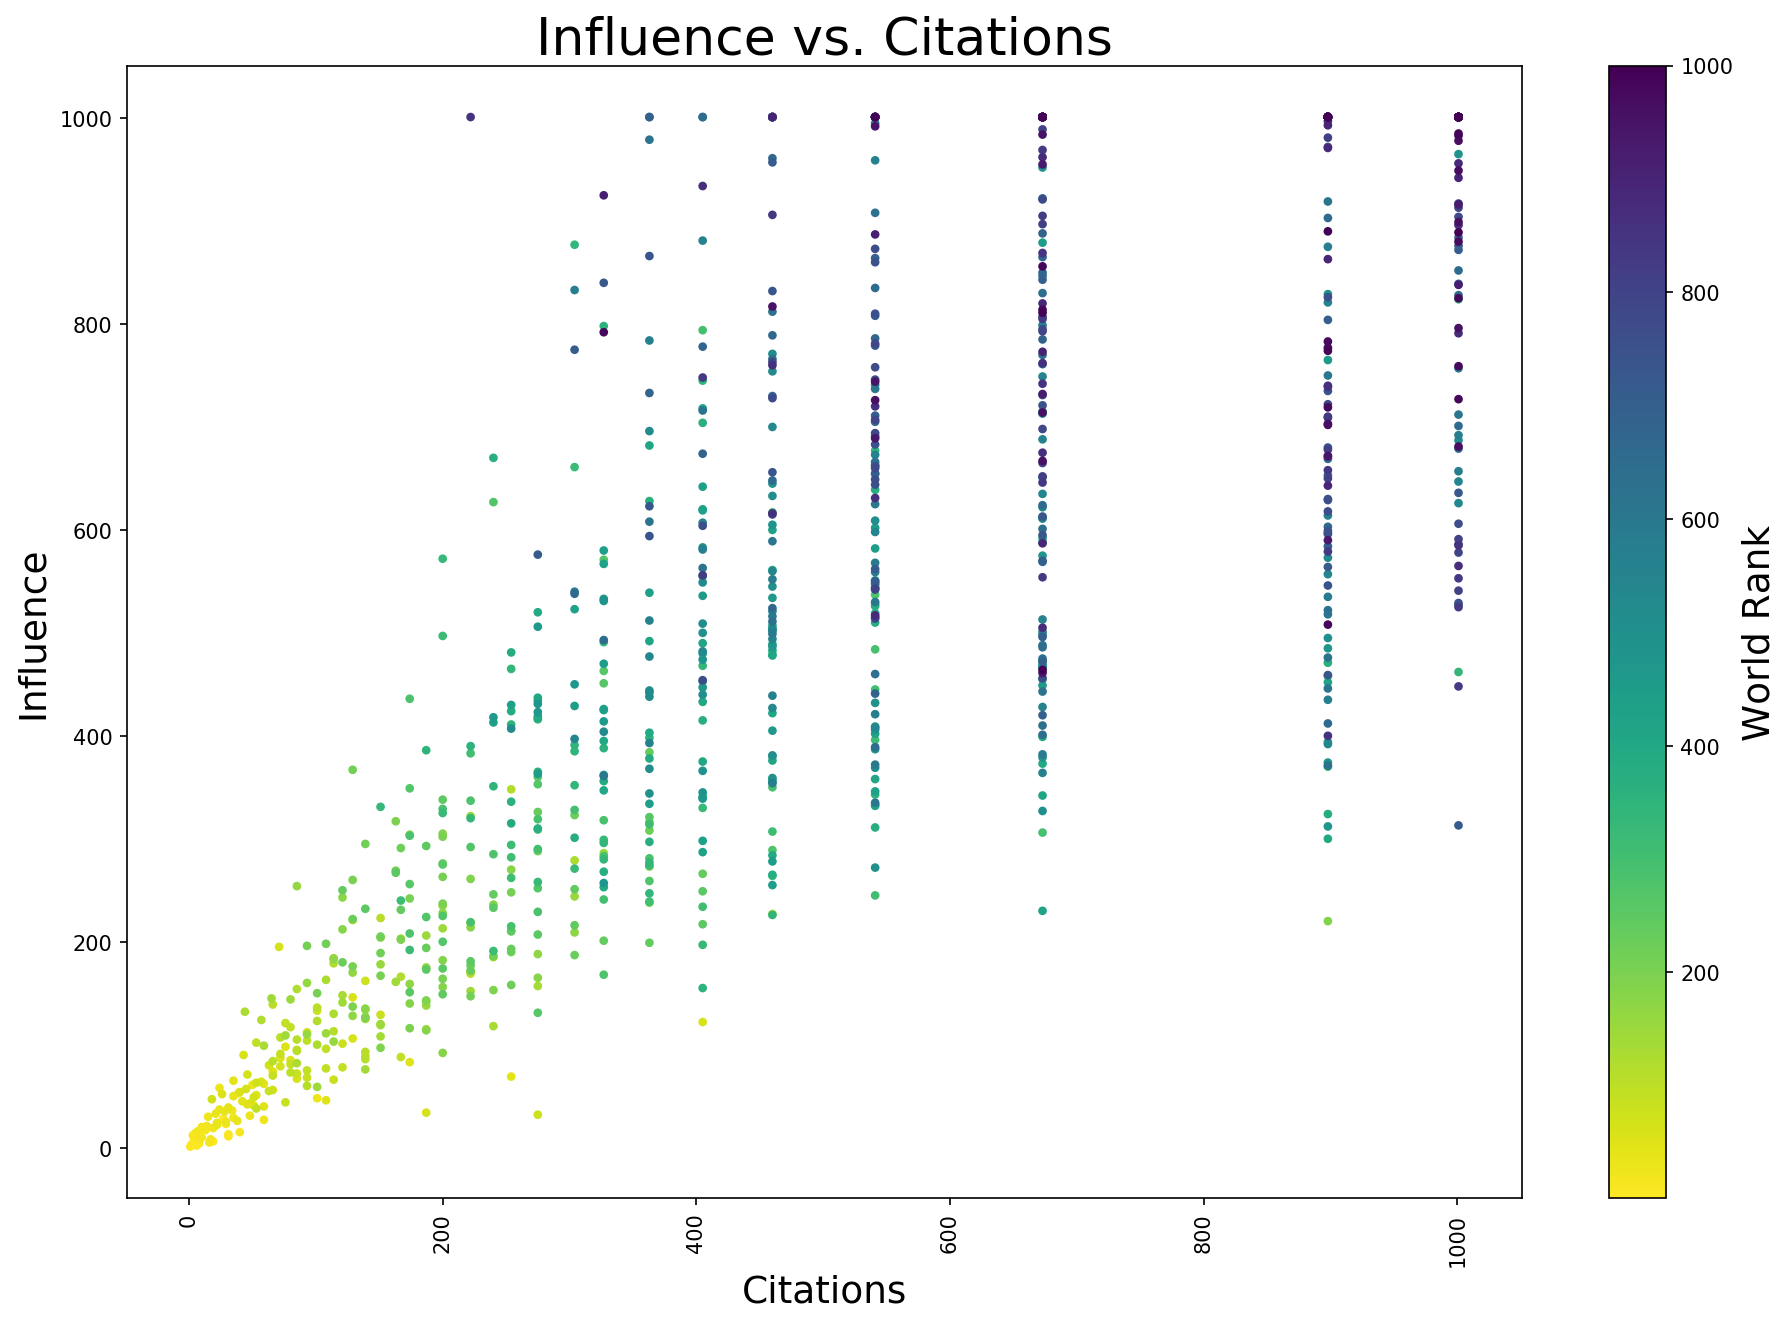

<Figure size 432x288 with 0 Axes>

In [28]:
#Influence vs. Citations basse on World Rank
plt.figure(figsize=(15,10), dpi = 150)
plt.scatter(df4["Citations"], df4["Influence"], c = df3['World Rank'],cmap='viridis_r', marker='o', s=10) # Plot the data
plt.title("Influence vs. Citations", fontsize = 25)
plt.xticks(rotation = 90)
plt.xlabel("Citations", fontsize = 18)
plt.ylabel("Influence", fontsize = 18)
plt.xticks(rotation = 90)
plt.colorbar().set_label('World Rank', fontsize = 18)
plt.show()

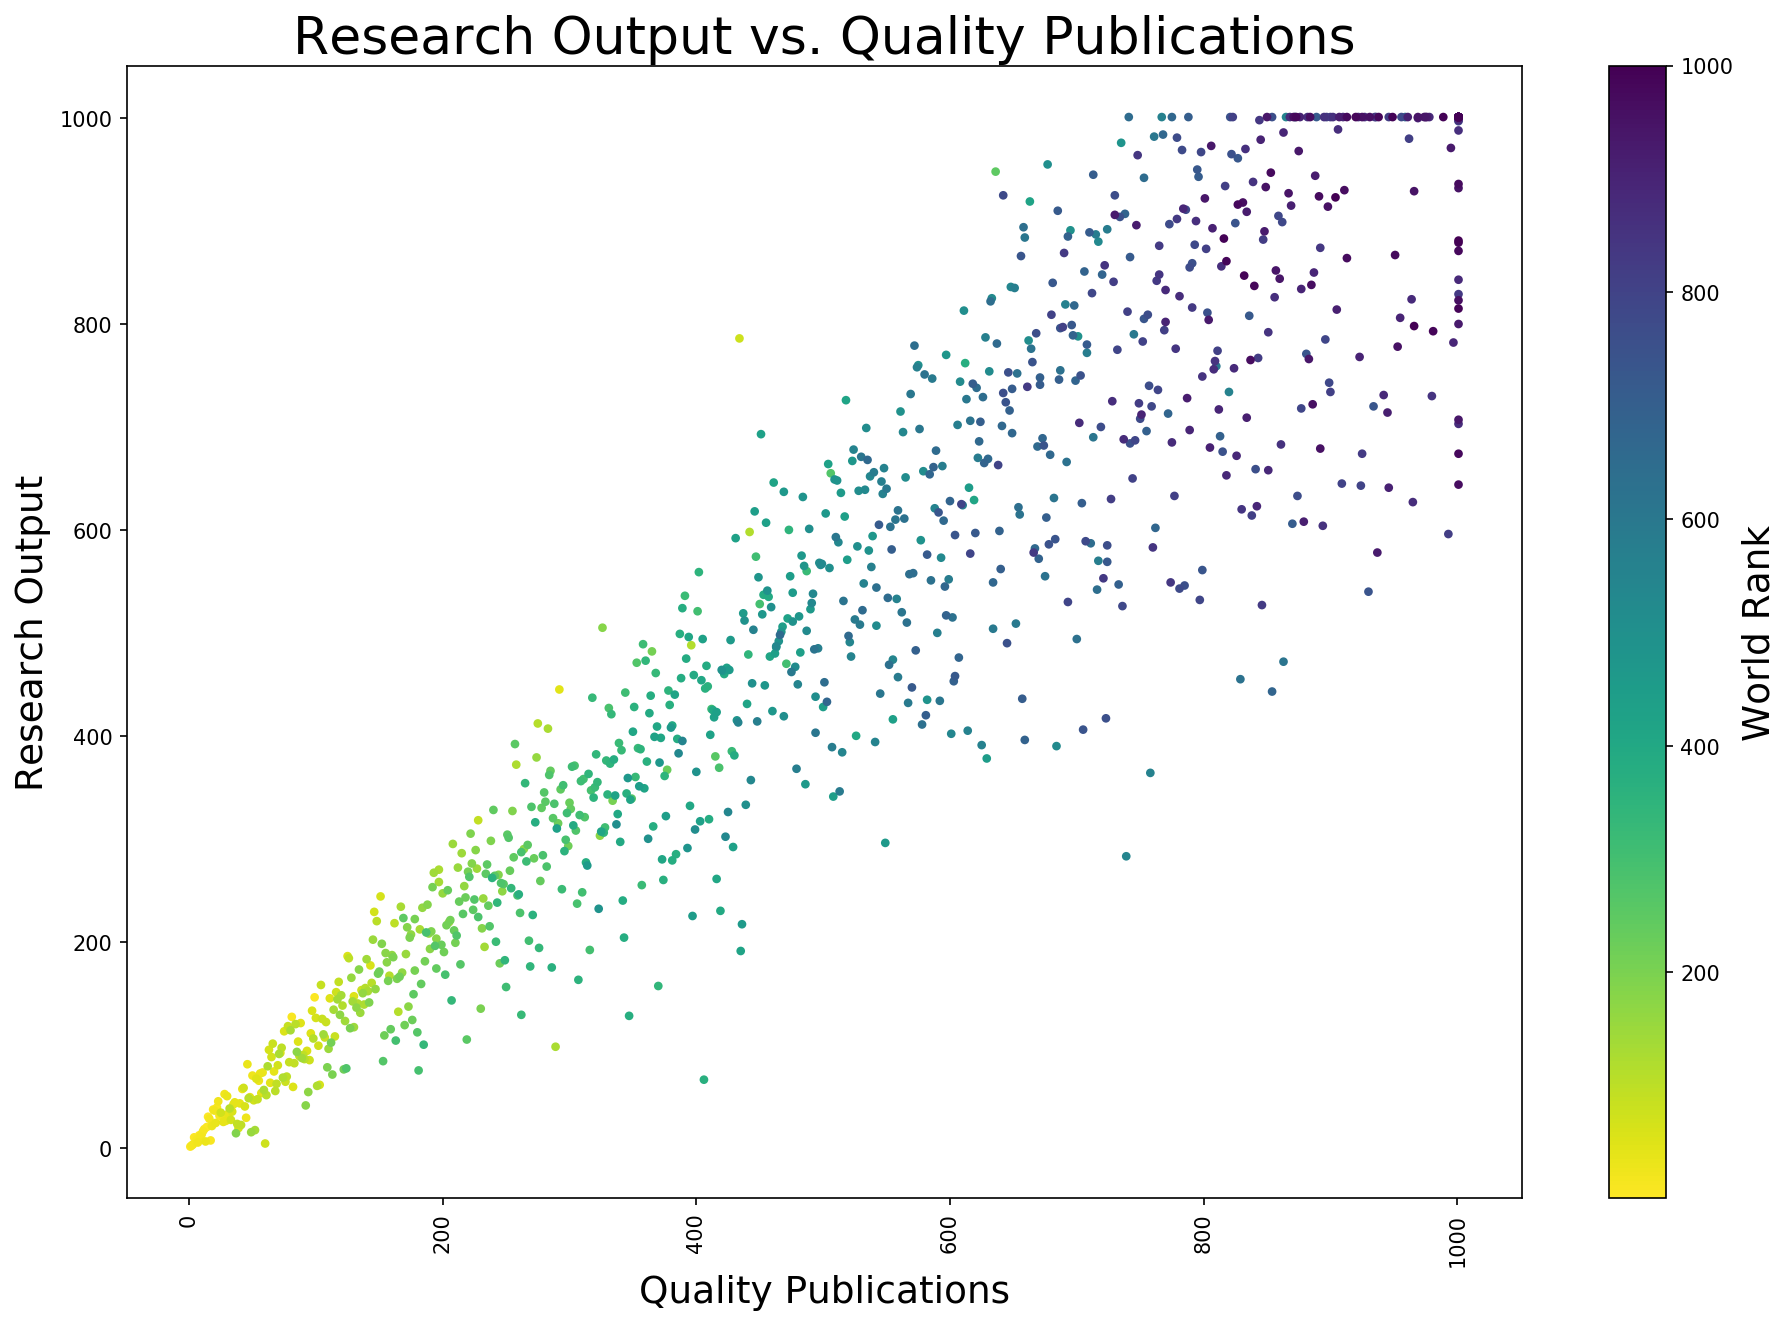

<Figure size 432x288 with 0 Axes>

In [29]:
#Research Output vs. Quality Publications base on World Rank
plt.figure(figsize=(15,10), dpi = 150)
plt.scatter(df4["Quality Publications"], df4["Research Output"], c = df3['World Rank'],cmap='viridis_r', marker='o', s=10) # Plot the data
plt.title("Research Output vs. Quality Publications", fontsize = 25)
plt.xticks(rotation = 90)
plt.xlabel("Quality Publications", fontsize = 18)
plt.ylabel("Research Output", fontsize = 18)
plt.colorbar().set_label('World Rank', fontsize = 18)
plt.show()